<a href="https://colab.research.google.com/github/Kazuyasus/Econometrics/blob/main/12th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

In [ ]:
# GitHubのdataを利用
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/income_mat.csv"

# CSVを読み込む
income = pd.read_csv(url)

#cograd 大学を卒業していれば1、そうでなければ0
#pacograd 父親が大学を卒業していれば1、そうでなければ0
#sibs　兄弟姉妹数

income.head()

,cograd,female,married,pacograd,sibs,lincome
0,0,0,0,0,0,4.605170
1,0,0,0,0,0,5.010635
2,0,0,0,0,0,5.298317
3,0,1,0,0,0,5.010635
4,0,1,0,0,0,4.605170


In [ ]:
# OLS Model
X = income[['pacograd', 'sibs']]
X = sm.add_constant(X)  # 定数項を追加
y = income['cograd']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 cograd   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     53.87
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           7.73e-24
Time:                        08:47:09   Log-Likelihood:                -2789.8
No. Observations:                4371   AIC:                             5586.
Df Residuals:                    4368   BIC:                             5605.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3235      0.015     21.978      0.0

In [ ]:
# 傾向スコア計算
score = model.predict(X)

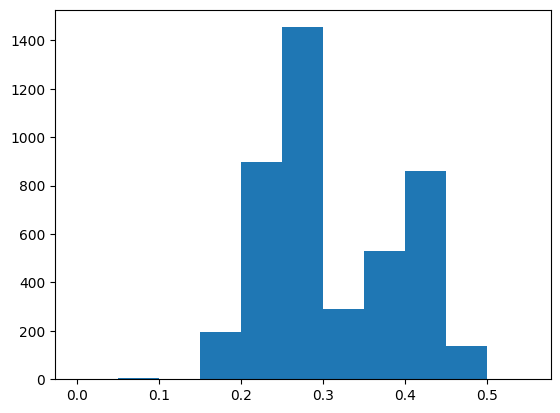

In [ ]:
# ヒストグラム
plt.hist(score, bins=np.arange(0, 0.6, 0.05))
plt.show()

In [ ]:
# 傾向スコアグループ分割
income['score'] = score
income['range'] = pd.cut(income['score'], bins=[0, 0.24, 0.29, 0.4, 1])

# 各範囲ごとの大卒者割合
print(income.groupby('range')['cograd'].describe())

               count      mean       std  min  25%  50%  75%  max
range                                                            
(0.0, 0.24]   1096.0  0.210766  0.408039  0.0  0.0  0.0  0.0  1.0
(0.24, 0.29]  1458.0  0.300412  0.458594  0.0  0.0  0.0  1.0  1.0
(0.29, 0.4]    818.0  0.354523  0.478661  0.0  0.0  0.0  1.0  1.0
(0.4, 1.0]     999.0  0.409409  0.491971  0.0  0.0  0.0  1.0  1.0


<ipython-input-8-eb3336c13f2f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(income.groupby('range')['cograd'].describe())


In [ ]:
# 0-0.24, 0.24-0.4, 0.4-1 ごとの大卒・それ以外の者の対数化した所得（lincome）の記述統計量
print(income.groupby(['cograd', 'range'])['lincome'].describe())


                      count      mean       std       min       25%       50%  \
cograd range                                                                    
0      (0.0, 0.24]    865.0  5.141145  0.865536  1.832582  4.828314  5.298317   
       (0.24, 0.29]  1020.0  5.252566  0.778031  1.832582  5.010635  5.329089   
       (0.29, 0.4]    528.0  5.079889  0.832029  1.832582  4.650639  5.298317   
       (0.4, 1.0]     590.0  4.913843  0.996330  1.832582  4.605170  5.164786   
1      (0.0, 0.24]    231.0  5.767925  0.575330  2.525729  5.521461  5.857933   
       (0.24, 0.29]   438.0  5.806065  0.570071  3.218876  5.521461  5.857933   
       (0.29, 0.4]    290.0  5.587648  0.826924  1.832582  5.298317  5.703783   
       (0.4, 1.0]     409.0  5.716905  0.631905  1.832582  5.521461  5.857933   

                          75%       max  
cograd range                             
0      (0.0, 0.24]   5.703783  7.226209  
       (0.24, 0.29]  5.742320  7.226209  
       (0.29, 0.4]   

<ipython-input-8-d731c8c903f9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(income.groupby(['cograd', 'range'])['lincome'].describe())


In [ ]:
##########################################################################################
# GitHubのdataを利用
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/wage_training.csv"

# CSVを読み込む
data = pd.read_csv(url)

data.head()

,wagea,T,years,wageb
0,19,1,4,18
1,27,0,22,27
2,20,1,2,18
3,36,1,14,34
4,28,0,6,28


In [ ]:
# 次に、Matchingの処理
Y = data['wagea']  # 研修後の賃金
C2 = data['wageb']  # 研修前の賃金
T = data['T']  # 研修参加の有無
C1 = data['years']  # 経験年数


In [ ]:
# 処置群と統制群の賃金(平均値)の差
treated_mean = np.sum(T * Y) / np.sum(T)
control_mean = np.sum((1 - T) * Y) / np.sum(1 - T)
print(f"平均差: {treated_mean - control_mean}")


平均差: -1.1284876940099906


In [ ]:
# 相関係数
print(np.corrcoef(T, C1)[0, 1]) # 研修と研修前賃金
print(np.corrcoef(T, C2)[0, 1]) # 研修と経験年数


-0.19082081159124875
-0.1839177312810466


In [ ]:
#標準化ユークリッド距離
#マハラノビス距離
#厳密なマッチング に関するクラス確認できず

In [ ]:

# GitHubのCSVデータを読み込む
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/lalonde.csv"
wage_data = pd.read_csv(url)

# ロジットモデル（職業訓練受講確率推計）
X_lalonde = wage_data[['age', 'educ', 'black', 'hisp', 'married', 'nodegr', 're74', 're75']]
X_lalonde = sm.add_constant(X_lalonde)  # 定数項を追加
y_lalonde = wage_data['treat']
logit_model = sm.Logit(y_lalonde, X_lalonde)
logit_result = logit_model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.659794
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  445
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                            8
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                 0.02811
Time:                        09:23:02   Log-Likelihood:                -293.61
converged:                       True   LL-Null:                       -302.10
Covariance Type:            nonrobust   LLR p-value:                   0.03028
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1777      1.056      1.115      0.265      -0.892       3.247
age            0.0047      0.

In [ ]:
# 2. 傾向スコア（推定値）と処置変数、目的変数を取り出す
X = logit_result.fittedvalues.values.reshape(-1, 1)
Tr = lalonde["treat"].values
Y = lalonde["re78"].values

In [ ]:
# 3. 最近傍マッチング（Nearest Neighbor Matching: M=1）
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X[Tr == 0])  # コントロール群で学習
distances, indices = nn.kneighbors(X[Tr == 1])  # 処置群をマッチング
matched_Y_control = Y[Tr == 0][indices.flatten()]
ATT_nn = np.mean(Y[Tr == 1] - matched_Y_control)
print(f"Nearest Neighbor ATT Estimate: {ATT_nn:.2f}")

# Rと一致しない

Nearest Neighbor ATT Estimate: 2694.43


In [ ]:
# 4. Caliperマッチング（距離0.1以内）
caliper = 0.1
within_caliper = distances.flatten() <= caliper
treated_Y_caliper = Y[Tr == 1][within_caliper]
matched_Y_caliper = matched_Y_control[within_caliper]
ATT_caliper = np.mean(treated_Y_caliper - matched_Y_caliper)
print(f"Caliper ATT Estimate (caliper=0.1): {ATT_caliper:.2f}")


# Rと一致しない

Caliper ATT Estimate (caliper=0.1): 2640.65


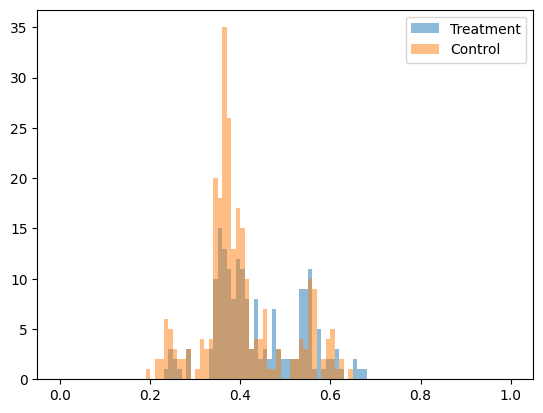

In [ ]:
# 5. コモンサポート
pscore_treat = X_score[T_lalonde == 1]
pscore_control = X_score[T_lalonde == 0]

plt.hist(pscore_treat, bins=np.arange(0, 1.01, 0.01), alpha=0.5, label='Treatment')
plt.hist(pscore_control, bins=np.arange(0, 1.01, 0.01), alpha=0.5, label='Control')
plt.legend()
plt.show()